In [2]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

'''
Készíts egy metódust ami a cifar100 adatbázisból betölti a train és test adatokat. (tf.keras.datasets.cifar100.load_data())
Majd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.


Egy példa a kimenetre: train_images, train_labels, test_images, test_labels
függvény neve: cifar100_data
'''

def cifar100_data():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    return (train_images, train_labels, test_images, test_labels)

datas = cifar100_data()
train_images, train_labels, test_images, test_labels = datas

(50000, 32, 32, 3)
50000
[[19]
 [29]
 [ 0]
 [11]
 [ 1]]
(10000, 32, 32, 3)
10000


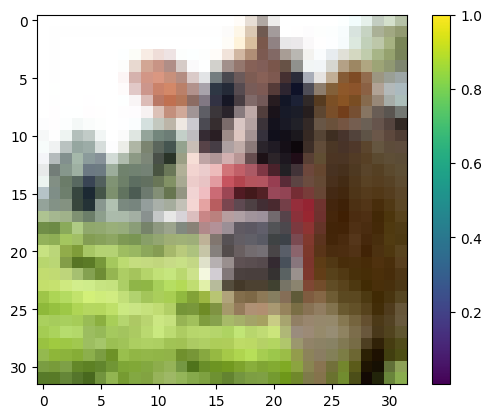

In [22]:
print(train_images.shape)
print(len(train_labels))
print(train_labels[0:5])
print(test_images.shape)
print(len(test_labels))
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
'''
Készíts egy konvolúciós neurális hálót, ami képes felismerni a képen mi van a 100 osztály közül.
A háló kimenete legyen 100 elemű, és a softmax aktivációs függvényt használja.
Hálon belül tetszőleges számú réteg lehet..


Egy példa a kimenetre: model,
return type: keras.engine.sequential.Sequential
függvény neve: cifar100_model
'''
from tensorflow.keras.models import Sequential

def cifar100_model() -> Sequential:
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
    ])
    
    return model

model = cifar100_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [7]:
'''
Készíts egy metódust, ami a bemeneti hálot compile-olja.
Optimizer: Adam
Loss: SparseCategoricalCrossentropy(from_logits=False)

Egy példa a bemenetre: model
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_compile
'''

def model_compile(model) -> Sequential:
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
    
    return model
    
compiled_model = model_compile(model)

In [8]:
'''
Készíts egy metódust, ami a bemeneti hálót feltanítja.

Egy példa a bemenetre: model,epochs, train_images, train_labelsz
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_fit
'''

def model_fit(model, epochs, train_images, train_labels) -> Sequential:
    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return model

fitted_model = model_fit(compiled_model, 10, train_images, train_labels)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 3.9510 - accuracy: 0.0933 - val_loss: 3.4936 - val_accuracy: 0.1664
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 3.3036 - accuracy: 0.2023 - val_loss: 3.1726 - val_accuracy: 0.2308
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 3.0071 - accuracy: 0.2568 - val_loss: 2.9246 - val_accuracy: 0.2766
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.8119 - accuracy: 0.2945 - val_loss: 2.8955 - val_accuracy: 0.2838
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.6721 - accuracy: 0.3224 - val_loss: 2.7951 - val_accuracy: 0.3050
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.5625 - accuracy: 0.3456 - val_loss: 2.6785 - val_accuracy: 0.3291
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.4703 - accuracy: 0.3643 - val_loss: 2.6634 -

In [11]:
'''
Készíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.

Egy példa a bemenetre: model, test_images, test_labels
Egy példa a kimenetre: test_loss, test_acc
return type: float, float
függvény neve: model_evaluate
'''

def model_evaluate(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    return test_loss, test_acc

test_loss, test_acc = model_evaluate(fitted_model, test_images, test_labels)
print(test_loss)


313/313 - 2s - loss: 2.5863 - accuracy: 0.3492 - 2s/epoch - 7ms/step
2.5863354206085205
